
# California Housing Regression Models
 Loading and Preprocessing 
Steps:
### 1. Loading the Dataset:
    * Use fetch_california_housing from sklearn.datasets to load the dataset.
    * Convert the dataset into a pandas DataFrame for better handling of features and labels.
### 2. Preprocessing:
    * Missing Values: Check for missing values using isnull().sum().
    * Duplicate Rows: Identify and remove duplicates (if any) to avoid bias in the model.
    * Removing Outliers: Outliers are detected using the IQR method and removed to improve model performance.
    * Skewness: Highly skewed features are transformed (e.g., using yeo-johnson).
    * Feature Selection: Highly correlated features are removed to prevent multicollinearity.
    * Feature Scaling: StandardScaler is used to scale features for algorithms sensitive to feature magnitudes.
  
### Justifications for Each Step
* Missing Values:
Even though this dataset does not have missing values, real-world datasets often do. Checking for and handling missing values ensures data readiness and integrity, preventing potential issues during model training and evaluation.

* Duplicate Rows:
Duplicate rows can lead to biased model predictions and overfitting, as the same data point is counted multiple times. Removing duplicates ensures data consistency and prevents skewed results.
* Outliers:
Outliers can distort the results of regression models, especially those sensitive to extreme values like linear regression. Removing or treating outliers improves the robustness and accuracy of the model.

* Skewness:
Skewed features can introduce bias in regression models by misrepresenting feature distributions. Addressing skewness through transformations (e.g., log, Yeo-Johnson) ensures that features are more normally distributed, leading to better model performance.

* Feature Selection:
Highly correlated features can result in multicollinearity, making it difficult for regression models to determine the importance of individual features. Removing redundant features improves model interpretability and predictive performance.

* Feature Scaling:
The features in the dataset vary in scale (e.g., population, median income). Scaling ensures all features contribute equally during training, which is critical for distance-based models like SVR and gradient-based models like Gradient Boosting.


In [166]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [167]:
data = fetch_california_housing()

In [168]:
x =data.data
y = data.target
feature =data.feature_names

In [169]:
df = pd.DataFrame(x,columns =feature)
df['target'] = y

In [170]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [171]:
# to get info about dataset(number of rows,non null count)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [172]:
# to get statistical information about all the numerical columns
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [173]:
# to get total null values in each column
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [174]:
# to find total duplicated rows
df.duplicated().sum()

0

<Axes: >

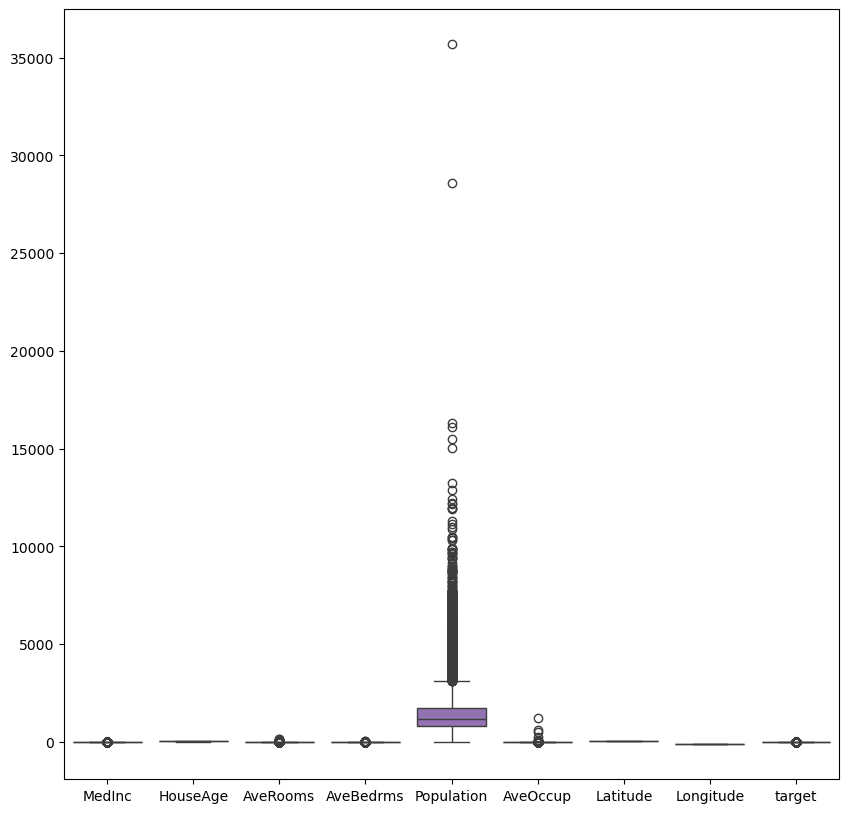

In [175]:
# Plot boxplot for dataframe
plt.figure(figsize =(10,10))
sns.boxplot(df)

In [176]:
# numerical columns together only
num_columns = df.select_dtypes(include = 'number')

In [177]:
num_columns

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


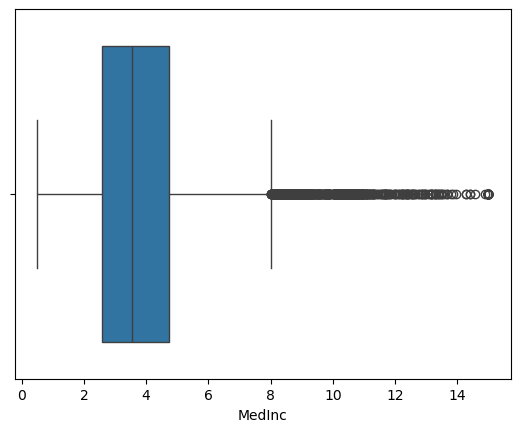

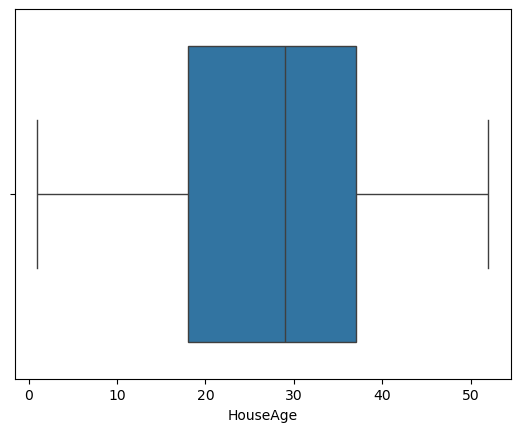

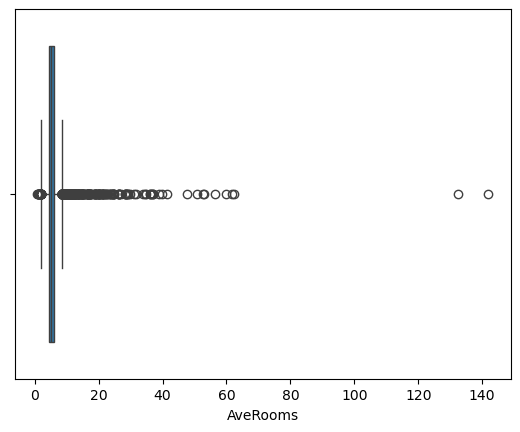

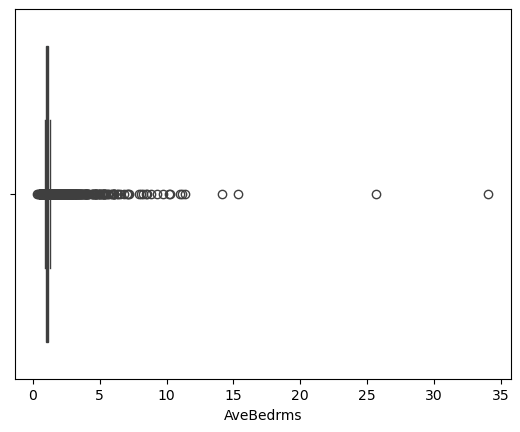

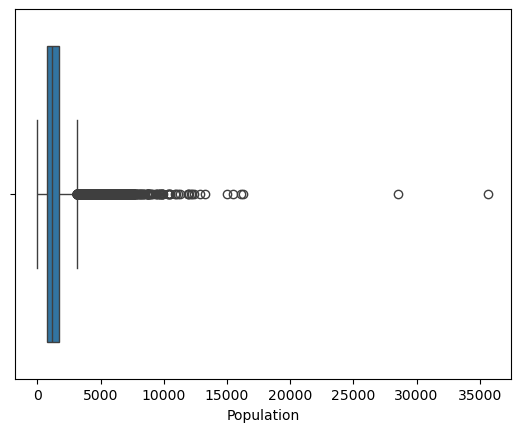

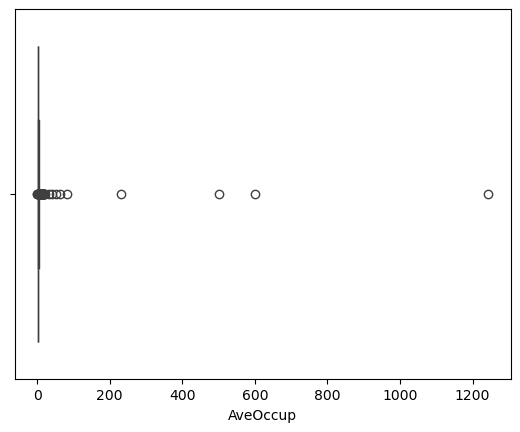

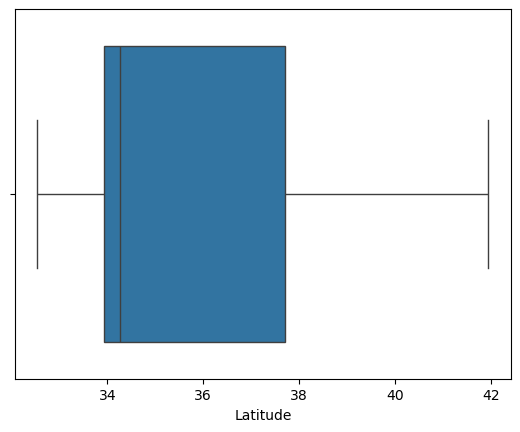

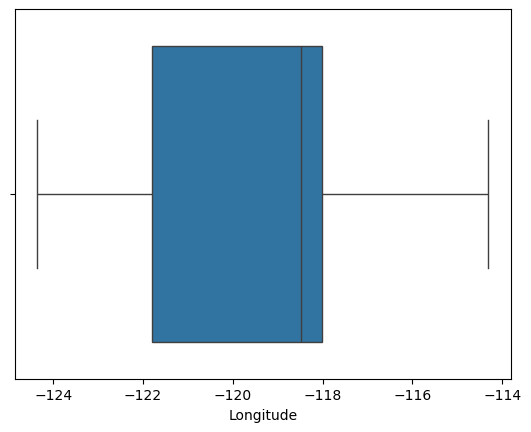

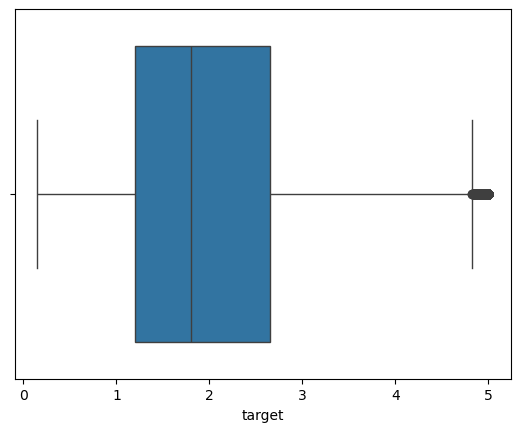

In [178]:
#loop designed to generate boxplots for each numerical column in a DataFrame
for i in num_columns:
    sns.boxplot(data = df,x=i)
    plt.show()

In [179]:
#IQR method to detect outliers
def outliers(df):
    for col in df.select_dtypes(include = 'float64').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower = Q1 -(1.5* IQR)
        Upper = Q3 + (1.5 * IQR)
        # capping
        df[col] = df[col].apply(lambda x : Lower if x < Lower else Upper if x > Upper else x)
    return df

In [180]:
# Assign Outliers removed data in new variable
df1=outliers(df)

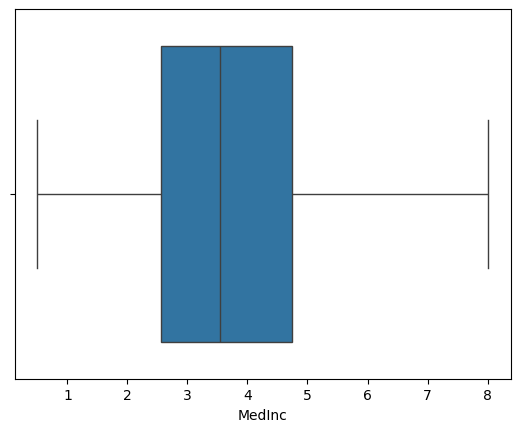

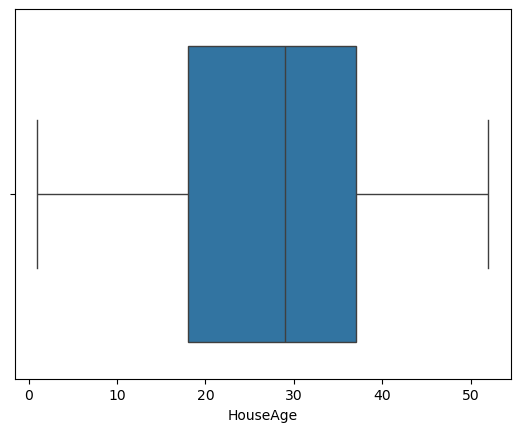

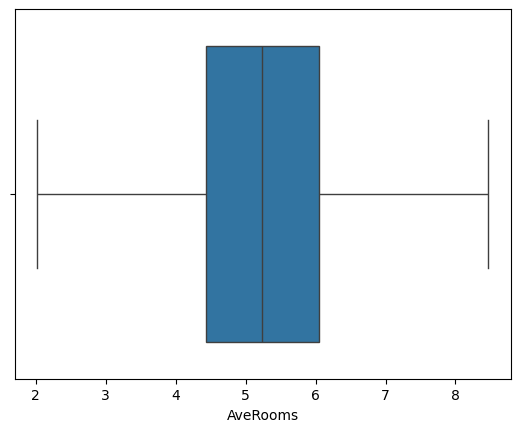

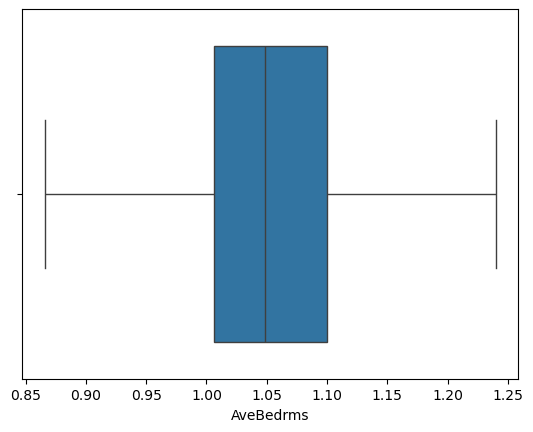

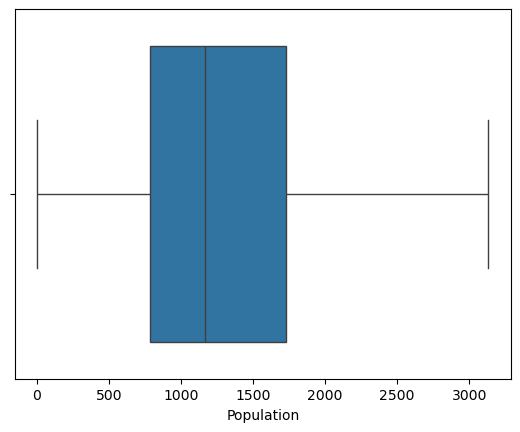

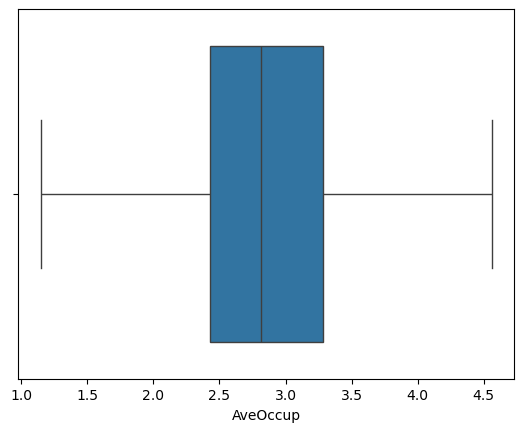

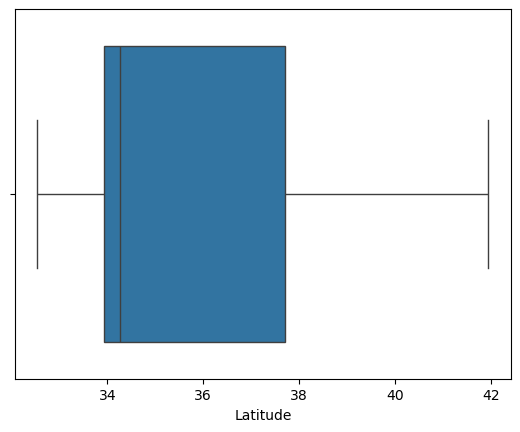

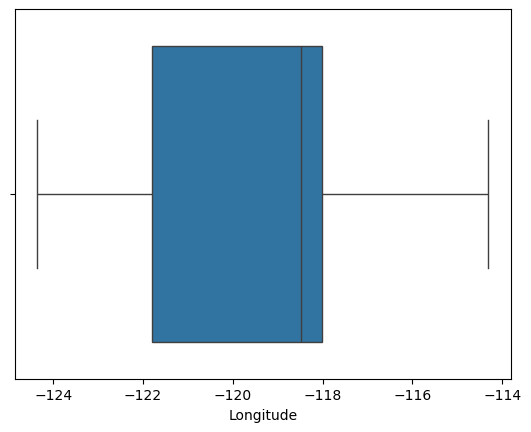

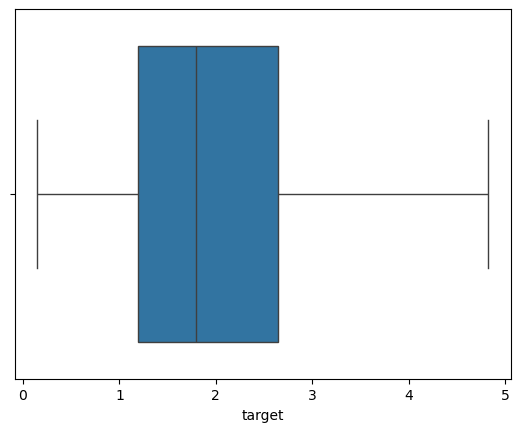

In [181]:
# boxplot after removing outliers
for i in num_columns:
    sns.boxplot(data = df1,x=i)
    plt.show()

In [182]:
# To detect skew
df1.skew()

MedInc        0.735618
HouseAge      0.060331
AveRooms      0.348567
AveBedrms     0.462645
Population    0.842247
AveOccup      0.510453
Latitude      0.465953
Longitude    -0.297801
target        0.912330
dtype: float64

In [183]:
# Apply transformation to remove skewness
pt = PowerTransformer(method ='yeo-johnson')
#to get numerical features(columns)
numerical_features = df.select_dtypes(include =['int64','float64']).columns
# to save skewness removed features
df1[numerical_features] = pt.fit_transform(df1[numerical_features])
df1[numerical_features].skew()

MedInc       -0.002164
HouseAge     -0.113089
AveRooms      0.002958
AveBedrms    -0.003923
Population    0.008781
AveOccup      0.000402
Latitude      0.153850
Longitude     0.000000
target        0.026767
dtype: float64

In [184]:
df2 = df1[numerical_features]


<Axes: title={'center': 'correlation housing price'}>

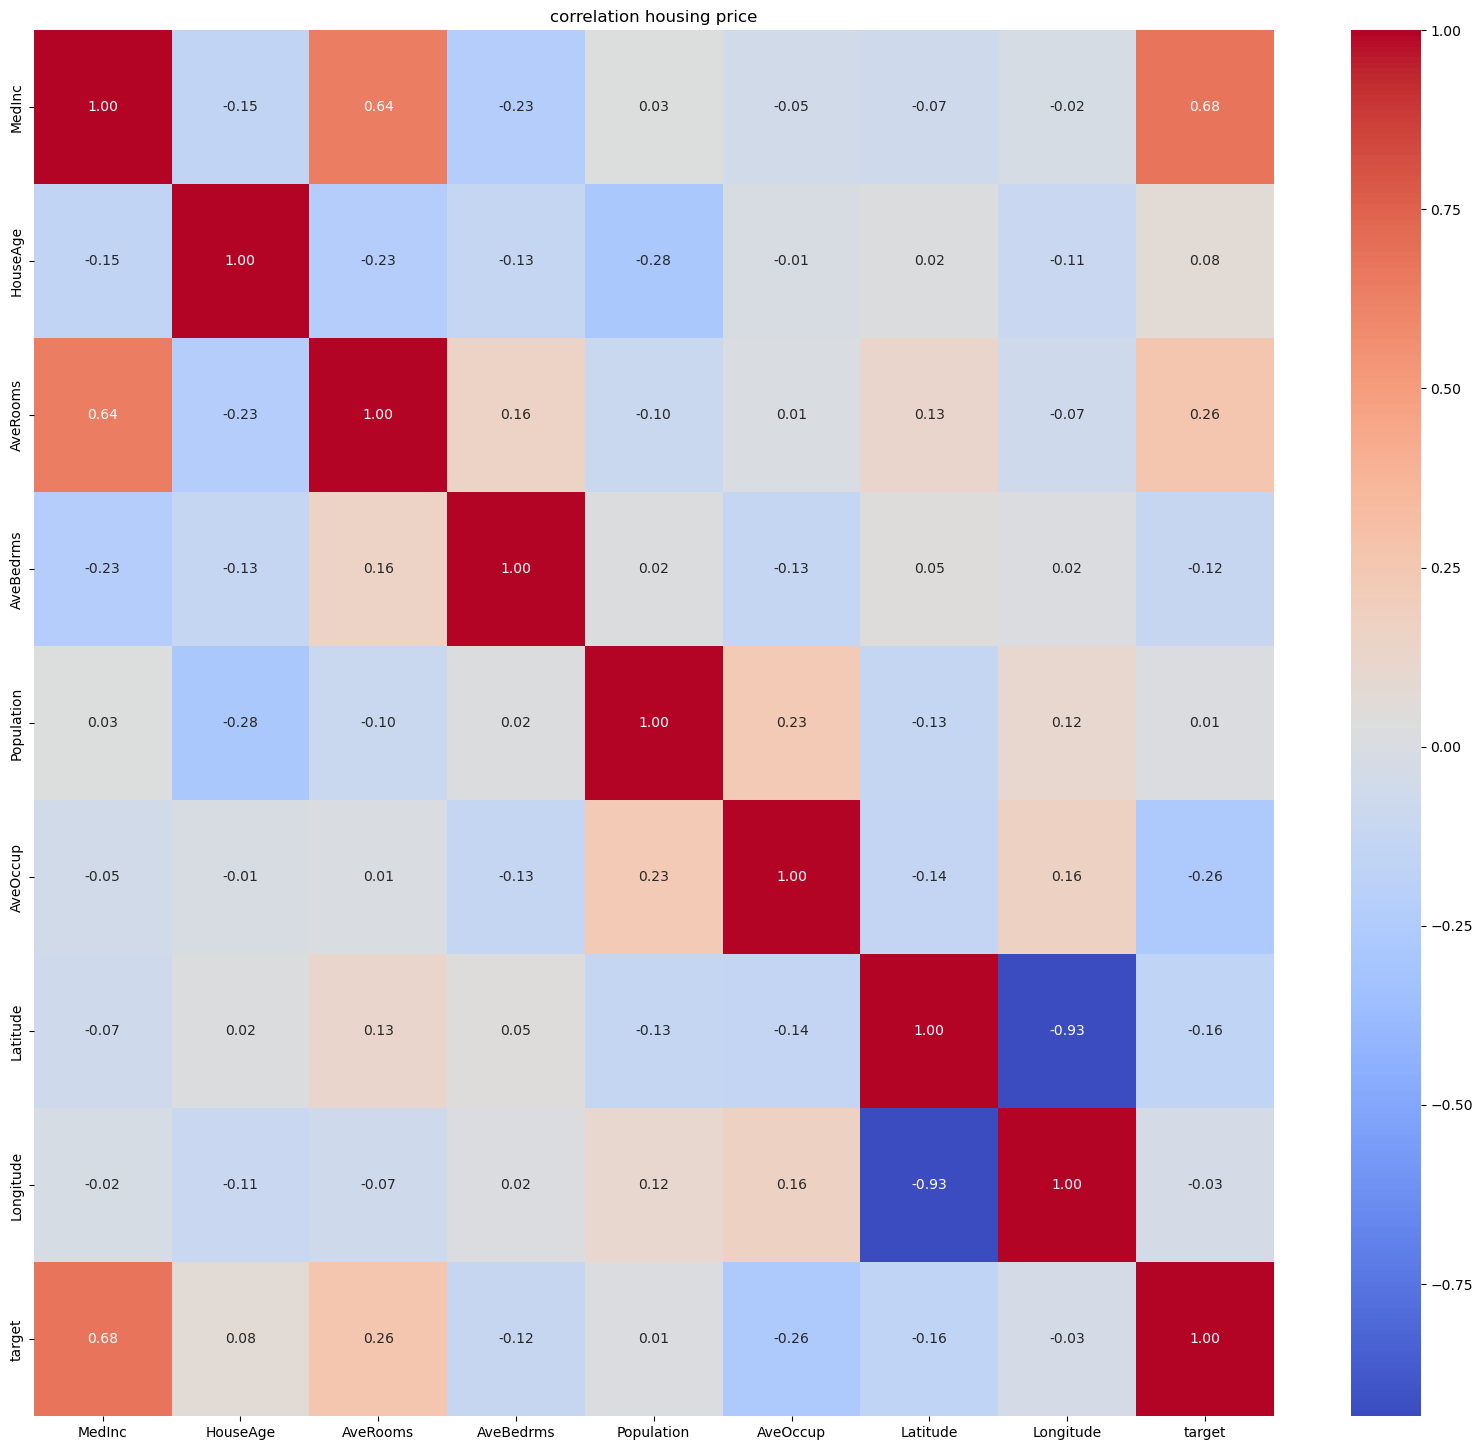

In [185]:
#correlation
correlation = df2.corr()
correlation
plt.figure(figsize=(20,18))
plt.title('correlation housing price')
sns.heatmap(correlation,annot = True,fmt ='.2f',cmap = 'coolwarm')

In [186]:
# feature selection
# selectkbest
x = df2.drop("target", axis=1)  
y = df2["target"]
sk=SelectKBest(score_func=f_regression,k=3)
x_new=sk.fit_transform(x,y)
# Get selected feature names and scores
selected_features = x.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['MedInc', 'AveRooms', 'AveOccup'], dtype='object')

Feature Scores:
      Feature         Score
0      MedInc  17961.958976
2    AveRooms   1544.731853
5    AveOccup   1539.962368
6    Latitude    567.435834
3   AveBedrms    302.686848
1    HouseAge    124.710759
7   Longitude     18.957391
4  Population      2.901431


In [187]:
x.columns


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [188]:
# Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# split data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size =0.2,random_state = 42)

### Regression Algorithm Implementation
#### 1. Linear Regression:
    * Description: A simple regression technique that assumes a linear relationship between features and the target.
    * Suitability: Suitable for datasets where the relationship between features and target is approximately linear.


In [190]:
# 1.LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)


LinearRegression()

In [191]:
#prediction
y_pred1 = model1.predict(x_test)

#Model evaluation in Regression : MAE,MSE,RMSE,R2Score
#Evaluation matrics
mae = mean_absolute_error(y_test,y_pred1)
mse = mean_squared_error(y_test,y_pred1)
rmse = np.sqrt(mean_squared_error(y_test,y_pred1))
r2 = r2_score(y_test,y_pred1)
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")


mae : 0.43576414679709935
mse : 0.33257276451990464
rmse : 0.5766912211226253
r2 : 0.6666318012802104


#### 2. Decision Tree Regressor:
    * Description: A non-linear model that splits data into regions based on feature thresholds.
    * Suitability: Useful for capturing non-linear patterns in data.


In [193]:
#2.DecisionTree Regressor
model5 = DecisionTreeRegressor()
model5.fit(x_train,y_train)

DecisionTreeRegressor()

In [194]:
y_pred5 = model5.predict(x_test)

#Evaluation Matrcs
mae = mean_absolute_error(y_test,y_pred5)
mse = mean_squared_error(y_test,y_pred5)
rmse = np.sqrt(mean_squared_error(y_test,y_pred5))
r2 = r2_score(y_test,y_pred5)
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

mae : 0.4040649508832278
mse : 0.34855549705521577
rmse : 0.5903858882588707
r2 : 0.6506108418862311


#### 3. Random Forest Regressor:
    * Description: An ensemble of decision trees that averages predictions to reduce variance and improve accuracy.
    * Suitability: Effective for handling complex datasets with non-linear relationships.


In [196]:
#Ensemble : 3.RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(x_train,y_train)

RandomForestRegressor()

In [197]:
#prediction
y_pred3 = model3.predict(x_test)

#Evaluation matrics
mae = mean_absolute_error(y_test,y_pred3)
mse = mean_squared_error(y_test,y_pred3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred3))
r2 = r2_score(y_test,y_pred3)
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

mae : 0.2884072243352124
mse : 0.1730730282017969
rmse : 0.41602046608525994
r2 : 0.8265130226706848


#### 4. Gradient Boosting Regressor:
    * Description: An advanced ensemble method that builds trees sequentially, focusing on reducing residual errors.
    * Suitability: Suitable for improving performance on complex datasets.


In [199]:
# 4.Gradient BoostingRegressor
model4 = GradientBoostingRegressor()
model4.fit(x_train,y_train)

GradientBoostingRegressor()

In [200]:
#prediction
y_pred4 = model4.predict(x_test)

#Evaluation matrics
mae = mean_absolute_error(y_test,y_pred4)
mse = mean_squared_error(y_test,y_pred4)
rmse = np.sqrt(mean_squared_error(y_test,y_pred4))
r2 = r2_score(y_test,y_pred4)
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

mae : 0.3299620846760112
mse : 0.20289991511058078
rmse : 0.4504441309536409
r2 : 0.7966147970100413


#### 5. Support Vector Regressor (SVR):
    * Description: A kernel-based technique that aims to fit a regression line within a margin of tolerance.
    * Suitability: Works well with scaled features and handles non-linear data effectively.

In [202]:
#5.Support Vector  SVR 
model2 =SVR()
model2.fit(x_train,y_train)

SVR()

In [203]:
#prediction
y_pred2 = model2.predict(x_test)

#Model evaluation in Regression : MAE,MSE,RMSE,R2Score
#Evaluation matrics
mae = mean_absolute_error(y_test,y_pred2)
mse = mean_squared_error(y_test,y_pred2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred2))
r2 = r2_score(y_test,y_pred2)
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")


mae : 0.3327568420986529
mse : 0.20901870573027842
rmse : 0.45718563596232814
r2 : 0.7904813717123421


#### 6.AdaBoost Regressor
* Description: An ensemble method that combines weak learners (e.g., decision stumps) iteratively, focusing on hard-to-predict instances.
* Suitability: Effective for modeling complex patterns; sensitive to noisy data and outliers.

In [205]:
# 6.Adaboostregressor
model6 = AdaBoostRegressor()
model6.fit(x_train,y_train)


AdaBoostRegressor()

In [206]:
y_pred6 = model6.predict(x_test)

#Evaluation Matrcs
mae = mean_absolute_error(y_test,y_pred6)
mse = mean_squared_error(y_test,y_pred6)
rmse = np.sqrt(mean_squared_error(y_test,y_pred6))
r2 = r2_score(y_test,y_pred6)
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

mae : 0.5357847777805771
mse : 0.4410054481635898
rmse : 0.6640824106717402
r2 : 0.5579397726926301


#### 7.MLP Regressor 
* Description: A neural network model with multiple layers that learns non-linear relationships through backpropagation.
* Suitability: Ideal for capturing complex, non-linear patterns; requires careful scaling and hyperparameter tuning.

In [208]:
#7.MlPRegressor
model7 = MLPRegressor()
model7.fit(x_train,y_train)

MLPRegressor()

In [209]:
y_pred7 = model7.predict(x_test)

#Evaluation Matrcs
mae = mean_absolute_error(y_test,y_pred6)
mse = mean_squared_error(y_test,y_pred6)
rmse = np.sqrt(mean_squared_error(y_test,y_pred6))
r2 = r2_score(y_test,y_pred6)
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

mae : 0.5357847777805771
mse : 0.4410054481635898
rmse : 0.6640824106717402
r2 : 0.5579397726926301


### Model Evaluation and Comparison 
##### Evaluation Metrics:

* Mean Squared Error (MSE): Measures average squared difference between actual and predicted values.
* Mean Absolute Error (MAE): Measures average absolute difference between actual and predicted values.
* R-squared Score (R²): Explains the proportion of variance captured by the model.
* Root Mean Squared Error (MSE) : Provides a measure of error similar to MSE but in the same unit as the target variable.

##### Compare Models:
* Evaluate all models using the metrics above.
* Identify the best-performing and worst-performing models based on the metrics.

In [211]:
models={
    '1. Linear Regression':LinearRegression(),
    '2. Decision Tree Regressor':DecisionTreeRegressor(),
    '3. Random Forest Regressor':RandomForestRegressor(), 
    '4. Gradiant Boosting Regressor':GradientBoostingRegressor(), 
    '5. Support Vector Regressor':SVR(),
    '6. MLPRegressor' : MLPRegressor(),
    '7. AdaBoostRegressor' : AdaBoostRegressor()
    
}

In [212]:
# MODEL EVALUATION
results={} # use to store evaluation result 

for model_name, model in models.items():
    # fit the model
    model.fit(x_train,y_train)  
    # make the prediction
    y_pred = model.predict(x_test)
    # Evaluate the model
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    # Store the results
    results[model_name] = {"MSE": mse, "MAE":mae,"RMSE":rmse,"R2": r2,}


In [213]:
results_df = pd.DataFrame(results).T # t for transporse
print(results_df)

                                     MSE       MAE      RMSE        R2
1. Linear Regression            0.332573  0.435764  0.576691  0.666632
2. Decision Tree Regressor      0.346539  0.403358  0.588675  0.652632
3. Random Forest Regressor      0.169176  0.286094  0.411310  0.830419
4. Gradiant Boosting Regressor  0.202963  0.330046  0.450514  0.796552
5. Support Vector Regressor     0.209019  0.332757  0.457186  0.790481
6. MLPRegressor                 0.193949  0.318575  0.440397  0.805587
7. AdaBoostRegressor            0.428254  0.527822  0.654411  0.570722


### Comparison of Models:
* All regression models (Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, Support Vector Regressor) are evaluated using the above metrics. The results for each model are compared to identify:

#### 1.Best-Performing Model:
* The model with the lowest MSE, MAE, and RMSE, and the highest R² score, indicating high accuracy and robustness in predictions.

#### 2.Worst-Performing Model:
* The model with the highest MSE, MAE, and RMSE, and the lowest R² score, suggesting poor performance and a weak ability to capture the variance in the dataset.


In [215]:
best_model1 = results_df.sort_values(by ='R2',ascending = False).iloc[0]
print(" Best Model :", best_model1)

 Best Model : MSE     0.169176
MAE     0.286094
RMSE    0.411310
R2      0.830419
Name: 3. Random Forest Regressor, dtype: float64


In [216]:
worst_model1 = results_df.sort_values(by ='R2',ascending = True).iloc[0]
print(" Worst Model :", worst_model1)

 Worst Model : MSE     0.428254
MAE     0.527822
RMSE    0.654411
R2      0.570722
Name: 7. AdaBoostRegressor, dtype: float64


In [217]:
#To save model
import joblib
joblib.dump(best_model1,'randomforestmodel.joblib')
#To load saved model
load_model = joblib.load('randomforestmodel.joblib')